In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [4]:
df = pd.read_csv("C:\\Users\\sanut\\Downloads\\house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [8]:
df.shape

(13200, 7)

In [3]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


C:\Users\sanut\AppData\Local\Temp\ipykernel_3848\3011192197.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])
C:\Users\sanut\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price_per_sqft', ylabel='Density'>

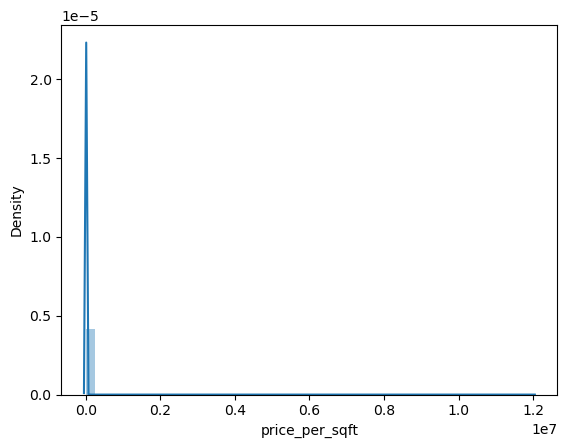

In [29]:
# To Find Skewness
sns.distplot(df['price_per_sqft'])

In [ ]:
## The graph shows that it is highly skewned. And it is right skewed

In [5]:
df['price_per_sqft'].kurtosis()

12095.21502832288

In [ ]:
## Here kurtosis value (k > 3) that mean herre kurtosis is very high and its not normally distributed 

<Axes: >

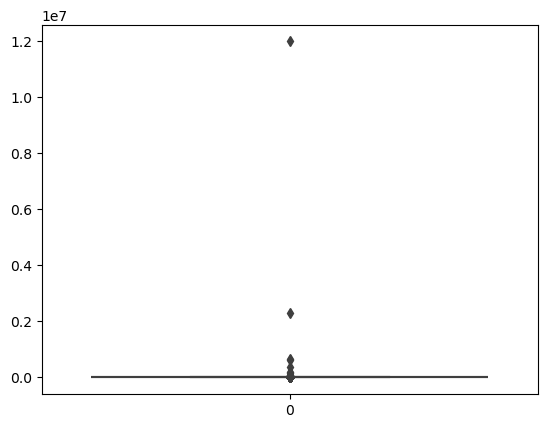

In [30]:
# Finding outliers
sns.boxplot(df['price_per_sqft'])

In [31]:
# Mean & Standard deviation
mean = df['price_per_sqft'].mean()
standard_deviation = df['price_per_sqft'].std()
print('mean',mean)
print('standard_deviation',standard_deviation)

mean 7920.336742424242
standard_deviation 106727.16032810845


In [54]:
## STANDARFD DEVIATION

In [32]:
#IQR(iNTER Quartile Range)
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
q1,q3

(4267.0, 7317.0)

In [33]:
# Iqr
iqr = q3-q1
iqr

3050.0

In [34]:
# Lower & Upper wisker
upper_wisker = q3+1.5*iqr
lower_wisker = q1-1.5*iqr
print(upper_wisker)
print(lower_wisker)

11892.0
-308.0


In [35]:
# Trimming
new_data = df[(df['price_per_sqft']> lower_wisker) & (df['price_per_sqft'] <upper_wisker)]
print('old dta',len(df))
print('new data',len(new_data))
print('outliers',len(df)-len(new_data))

old dta 13200
new data 11935
outliers 1265


<Axes: >

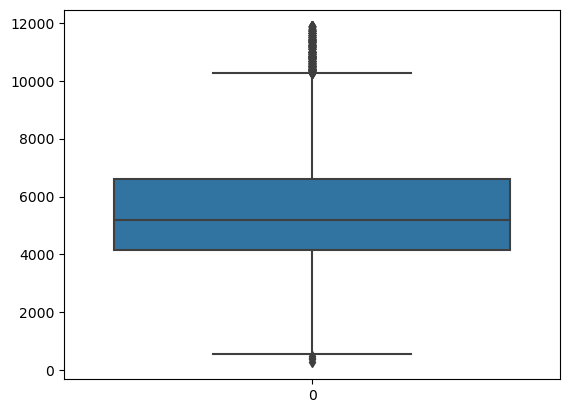

In [36]:
sns.boxplot(new_data['price_per_sqft'])

In [37]:
# Capping
new_data = df.copy()
new_data.loc[new_data['price_per_sqft']< lower_wisker,'price_per_sqft'] = lower_wisker
new_data.loc[new_data['price_per_sqft']> upper_wisker,'price_per_sqft']= upper_wisker

<Axes: >

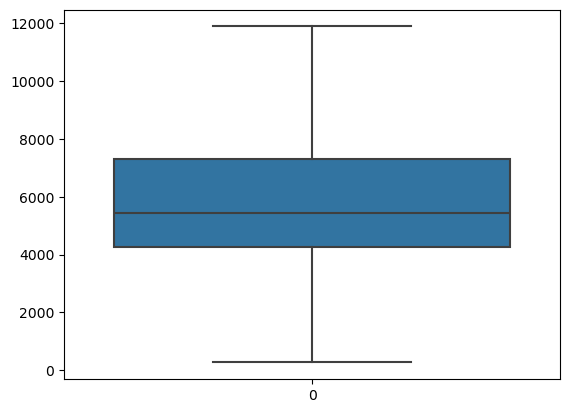

In [38]:
sns.boxplot(new_data['price_per_sqft'])

In [39]:
outliers = df[(df['price_per_sqft'] < lower_wisker) | (df['price_per_sqft'] > upper_wisker)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


In [43]:
outliers = df[(df['price_per_sqft'] > lower_wisker)& (df['price_per_sqft'] < upper_wisker)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [44]:
#Z- score
upper_level = df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower_level = df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print('upper_level' +'=',upper_level)
print('lower_level' +'=',lower_level)

upper_level= 328101.8177267496
lower_level= -312261.1442419011


In [45]:
# Finding outliers
df1 = df[(df['price_per_sqft']<lower_level) | (df['price_per_sqft'] >upper_level)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


In [46]:
df1 = df[(df['price_per_sqft']>lower_level) & (df['price_per_sqft'] <upper_level)]
df1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


<Axes: >

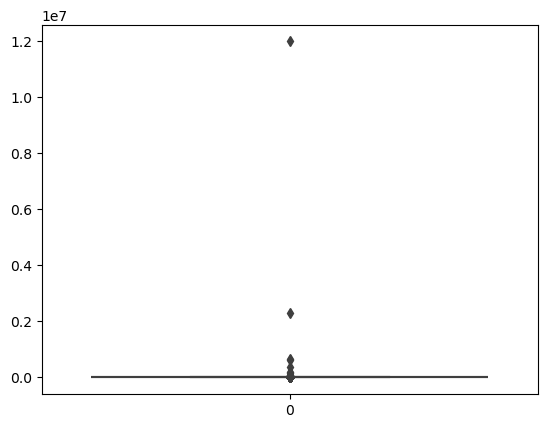

In [47]:
sns.boxplot(df['price_per_sqft'])

In [48]:
# Trimming
new_data = df[(df['price_per_sqft']> lower_level) & (df['price_per_sqft'] <upper_level)]
print('old dta',len(df))
print('new data',len(new_data))
print('outliers',len(df)-len(new_data))

old dta 13200
new data 13195
outliers 5


<Axes: >

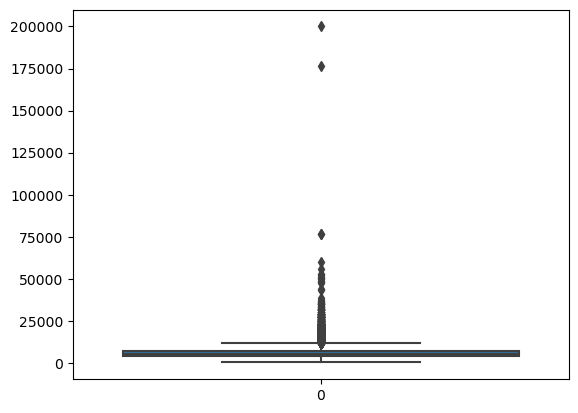

In [49]:
sns.boxplot(new_data['price_per_sqft'])

In [50]:
# Capping
new_data = df.copy()
new_data.loc[new_data['price_per_sqft']< lower_level,'price_per_sqft'] = lower_level
new_data.loc[new_data['price_per_sqft']> upper_level,'price_per_sqft']= upper_level

C:\Users\sanut\AppData\Local\Temp\ipykernel_3848\4022576147.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-312261.1442419011' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  new_data.loc[new_data['price_per_sqft']< lower_level,'price_per_sqft'] = lower_level


<Axes: >

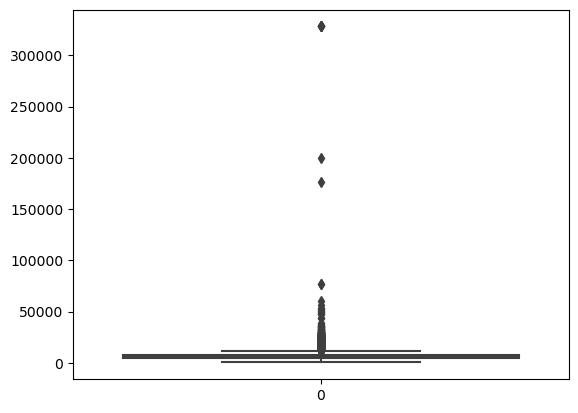

In [51]:
sns.boxplot(new_data['price_per_sqft'])

In [ ]:
## Percentile 

In [9]:
lower_level = df['price_per_sqft'].quantile(0.05)
upper_level = df['price_per_sqft'].quantile(0.95)
print(lower_level)
print(upper_level)

3107.8500000000004
15312.099999999984


In [10]:
df2 = df[(df['price_per_sqft'] < lower_level) | (df['price_per_sqft'] > upper_level)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


In [11]:
df2 = df[(df['price_per_sqft'] > lower_level) & (df['price_per_sqft'] < upper_level)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [14]:
# Trimming
df2= df[(df['price_per_sqft']>= lower_level) & (df['price_per_sqft'] <=upper_level)]
print('old dta',len(df))
print('new data',len(df2))
print('outliers',len(df)-len(df2))

old dta 13200
new data 11880
outliers 1320


<Axes: >

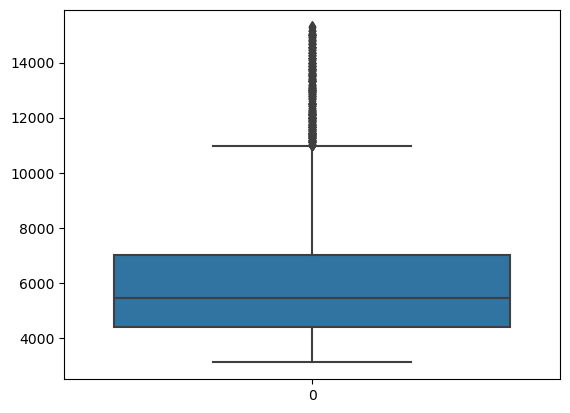

In [16]:
sns.boxplot(df2['price_per_sqft'])

In [15]:
# Capping
df2.loc[df2['price_per_sqft']< lower_level,'price_per_sqft'] = lower_level
df2.loc[df2['price_per_sqft']>upper_level,'price_per_sqft'] = upper_level

C:\Users\sanut\AppData\Local\Temp\ipykernel_4124\2543152723.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '3107.8500000000004' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df2.loc[df2['price_per_sqft']< lower_level,'price_per_sqft'] = lower_level


<Axes: >

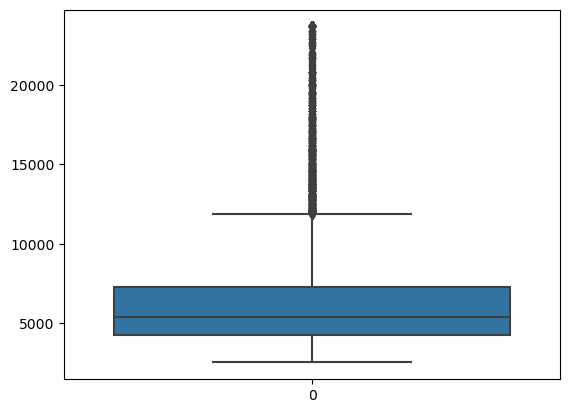

In [40]:
sns.boxplot(df2['price_per_sqft'])

In [19]:
## correlation
correlation = df.select_dtypes(include =['number']).corr()
correlation

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


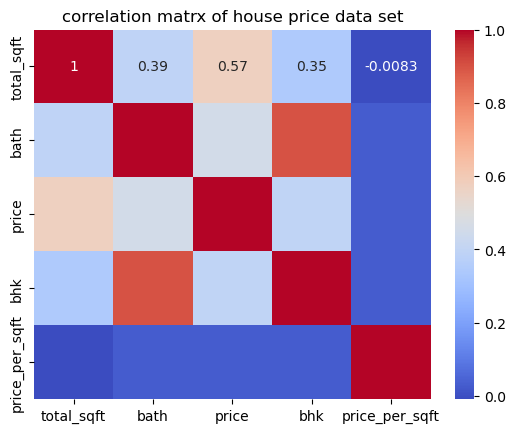

In [23]:
## Heatmap co
sns.heatmap(correlation,annot=True,cmap = 'coolwarm')
plt.title('correlation matrx of house price data set')
plt.show()

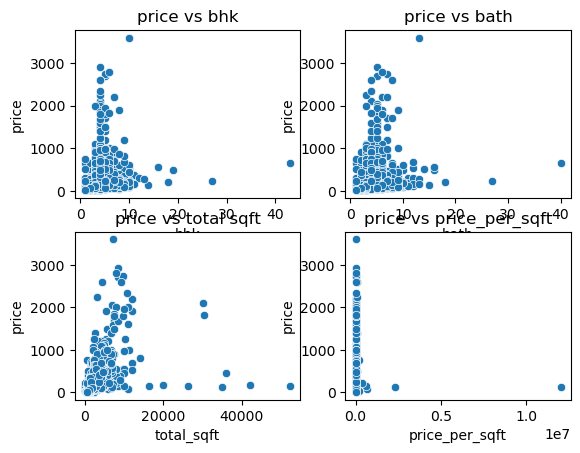

In [17]:
## Scatterplopt
plt.subplot(2,2,1)
sns.scatterplot(y ='price',x= 'bhk',data = df)
plt.title('price vs bhk')
plt.subplot(2,2,2)
sns.scatterplot(y ='price',x ='bath',data = df)
plt.title('price vs bath')
plt.subplot(2,2,3)
sns.scatterplot(y= 'price',x = 'total_sqft',data = df)
plt.title('price vs total sqft')
plt.subplot(2,2,4)
sns.scatterplot(y ='price',x = 'price_per_sqft',data = df)
plt.title('price vs price_per_sqft')
plt.show()

In [19]:
# Variance
variance = statistics.variance(df['price_per_sqft'])
variance

11390686751.701809

<Axes: >

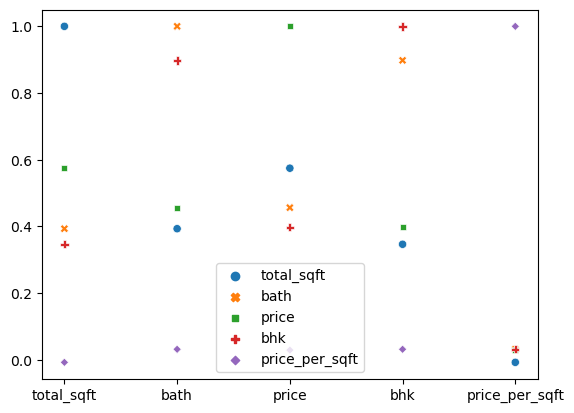

In [49]:
correlation = df.select_dtypes(include =['number']).corr()
sns.scatterplot(correlation)